In [1]:
import os
from shutil import copy
from shutil import move
import pySPM
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
root_folder = 'C:\\Users\\Jesse\\Desktop\\STM Machine Learning\\'
stm_root_folder = 'Source Data\\'
src_folder = 'Packet 1\\'
src_folder_path = os.path.join(root_folder, stm_root_folder, src_folder)
num_files = len(os.listdir(src_folder_path)) - 1 # Skips the desktip.ini hidden file
print('Found {} files in {}'.format(num_files, src_folder_path))

Found 5 files in C:\Users\Jesse\Desktop\STM Machine Learning\Source Data\Packet 1\


In [3]:
dst_root_folder = 'Sorted Images\\'
dst_path = os.path.join(root_folder, dst_root_folder,'au-111_herringbone')
dst_path_nothb = os.path.join(root_folder, dst_root_folder,'not-au-111_herringbone')
dst_path_unsure = os.path.join(root_folder, dst_root_folder,'unsure')
dst_path_issue = os.path.join(root_folder, dst_root_folder,'issues')

C:\Users\Jesse\Desktop\STM Machine Learning\Source Data\Packet 1\Au(111) - NewTip003.sxm


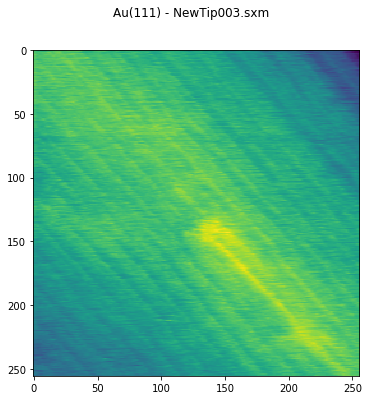

Is Herringbone present in the image (y/n or u for 'unsure')?:  u


----------------------------------------------------------------------
C:\Users\Jesse\Desktop\STM Machine Learning\Source Data\Packet 1\Au(111) - NewTip004.sxm
Error detected. Moving problematic file to:  C:\Users\Jesse\Desktop\STM Machine Learning\Sorted Images\issues
C:\Users\Jesse\Desktop\STM Machine Learning\Source Data\Packet 1\Au(111) flashed tip004.sxm
Error detected. Moving problematic file to:  C:\Users\Jesse\Desktop\STM Machine Learning\Sorted Images\issues
C:\Users\Jesse\Desktop\STM Machine Learning\Source Data\Packet 1\Au(111) flashed tip005.sxm
Error detected. Moving problematic file to:  C:\Users\Jesse\Desktop\STM Machine Learning\Sorted Images\issues
C:\Users\Jesse\Desktop\STM Machine Learning\Source Data\Packet 1\Au(111) flashed tip007.sxm
Error detected. Moving problematic file to:  C:\Users\Jesse\Desktop\STM Machine Learning\Sorted Images\issues
C:\Users\Jesse\Desktop\STM Machine Learning\Source Data\Packet 1\Au(111) flashed tip012.sxm
Error detected. Moving problemat

In [4]:
for file in os.listdir(src_folder_path):
    try:
        if file.endswith(".sxm"):
            # Read sxm STM data
            src_path = os.path.join(src_folder_path,file)
            print(src_path)
            data = pySPM.SXM(src_path)
            try:
                image = data.get_channel('Z').correct_plane(inline=False)
                data.closefile()
            
                # Plot current image
                fig = plt.figure(figsize = (6,6))
                plt.suptitle(file)
                plt.imshow(image.pixels)
                plt.pause(0.2)
            
                # Wait for and validate label input
                valid_input = False
                while (not valid_input):
                    label = input("Is Herringbone present in the image (y/n or u for 'unsure')?: ")
                    if (label == 'y'):
                        move(src_path, dst_path)
                        valid_input = True
                        print('File copied to {} and labeled Herringbone'.format(dst_path))
                    elif (label == 'n'):
                        move(src_path, dst_path_nothb)
                        valid_input = True
                    elif (label == 'u'):
                        move(src_path, dst_path_unsure)
                        valid_input = True
                    else:
                        print('Invalid input. Please enter \'y\' or \'n\'.')
            
                print('----------------------------------------------------------------------')
            except:
                data.closefile()
                move(src_path, dst_path_issue)
                print('Error detected. Moving problematic file to: ',dst_path_issue)
            
    except Exception as e:
        raise e
        print("Error! No files found here or some input problem occured!")

print('All files in folder have been labeled.')